In [2]:
from os import listdir
from os.path import isfile, join, isdir
dossier="networkx-main"
fichiers = [join(dossier, f) for f in listdir(dossier) if isfile(join(dossier, f)) and ".py" in f]
dossiers = [join(dossier, f) for f in listdir(dossier) if isdir(join(dossier, f))]

## BFS à partir du dossier networkx-main

In [3]:
from queue import Queue
q = Queue()
q.put(dossier)
liste_fichiers=[]

while not q.empty():
    dossier = q.get()
    fichiers = [join(dossier, f) for f in listdir(dossier) if isfile(join(dossier, f)) and ".py" in f]
    liste_fichiers+=fichiers
    for f in listdir(dossier):
        if isdir(join(dossier, f)):
            q.put(join(dossier, f))

In [4]:
# Résultat du BFS
len(liste_fichiers)

628

In [5]:
# Transformer un chemin sur le disque en un package importé
def to_package(fichier):
    return fichier.replace("/", ".")[14:-3]
    
# Fonction utilisé lorsque l'import dans un fichier commence par un ..
def previous_package(fichier, package):
    fichier = to_package(fichier)
    fichier = fichier[:fichier.rfind(".")]
    #print("ici", fichier[:fichier.rfind(".")]+"."+package[2:])
    return fichier[:fichier.rfind(".")]+"."+package[2:]

# Fonction utilisé lorsque l'import dans un fichier commence par un .
def current_package(fichier, package):
    fichier = to_package(fichier)
    return fichier[:fichier.rfind(".")]+"."+package[1:]

for f in liste_fichiers[:20]:
    print(to_package(f))

setup
networkx.__init__
networkx.lazy_imports
networkx.conftest
networkx.exception
networkx.convert_matrix
networkx.relabel
networkx.convert
doc.conf
tools.team_list
networkx.drawing.nx_agraph
networkx.drawing.__init__
networkx.drawing.nx_pydot
networkx.drawing.nx_pylab
networkx.drawing.layout
networkx.utils.rcm
networkx.utils.__init__
networkx.utils.union_find
networkx.utils.mapped_queue
networkx.utils.random_sequence


In [6]:
import networkx as nx
nodes = set()
G = nx.DiGraph()
for nom_fichier in liste_fichiers:
    fichier=open(nom_fichier)
    for ligne in fichier:
        tab = ligne.split(" ")
        
        # Import avec From
        if "from" == tab[0]:
            package = tab[1].strip()
            package2 = package
            if package == ".":
                continue
            if package.startswith("..."):
                continue
            if package.startswith(".."):
                package = previous_package(nom_fichier, package)
            elif package.startswith("."):
                package = current_package(nom_fichier, package)
            nodes.add(package)
            #nom_fichier = to_package(nom_fichier)
            G.add_edge(to_package(nom_fichier), package)
        
        #Import avec import
        elif "import" == tab[0]:
            # Si import de plusieurs fichiers séparés par des virgules. Existe en python ou slmt en Java ? ^^
            if "," in tab[1]:
                packages = tab[1].split(",")
                for package in package:
                    nodes.add(package.strip()) 
                    G.add_edge(to_package(nom_fichier), package.strip())
            else:
                nodes.add(tab[1].strip()) 
                G.add_edge(to_package(nom_fichier), tab[1].strip())
print(G)        

DiGraph with 710 nodes and 2018 edges


In [7]:
nodes

{'OpenStreetMap,',
 'PIL',
 'ast',
 'bisect',
 'bz2',
 'codecs',
 'collections',
 'collections.abc',
 'contextily',
 'contextlib',
 'copy',
 'dataclasses',
 'datetime',
 'email.utils',
 'enum',
 'flask',
 'functools',
 'gc',
 'geopandas',
 'glob',
 'gzip',
 'hashlib',
 'heapq',
 'html.entities',
 'igraph',
 'importlib',
 'importlib.util',
 'inspect',
 'io',
 'itertools',
 'json',
 'libpysal',
 'libpysal.cg',
 'locale',
 'mailbox',
 'math',
 'matplotlib',
 'matplotlib.pyplot',
 'mayavi',
 'momepy',
 'mpl_toolkits.mplot3d',
 'multiprocessing',
 'networkx',
 'networkx.algorithms',
 'networkx.algorithms.approximation',
 'networkx.algorithms.approximation.clique',
 'networkx.algorithms.approximation.clustering_coefficient',
 'networkx.algorithms.approximation.connectivity',
 'networkx.algorithms.approximation.distance_measures',
 'networkx.algorithms.approximation.dominating_set',
 'networkx.algorithms.approximation.kcomponents',
 'networkx.algorithms.approximation.matching',
 'networkx.alg

In [12]:
import matplotlib.pyplot as plt
for component in nx.weakly_connected_components(G):
    G_comp = nx.induced_subgraph(G,component)
    if G_comp.number_of_nodes() > 3:
        plt.figure()
        nx.draw_spring(G_comp, with_labels=False, alpha=0.7, width=0.6, node_color='gray')
        plt.show()

AttributeError: module 'scipy.sparse' has no attribute 'coo_array'

<Figure size 432x288 with 0 Axes>

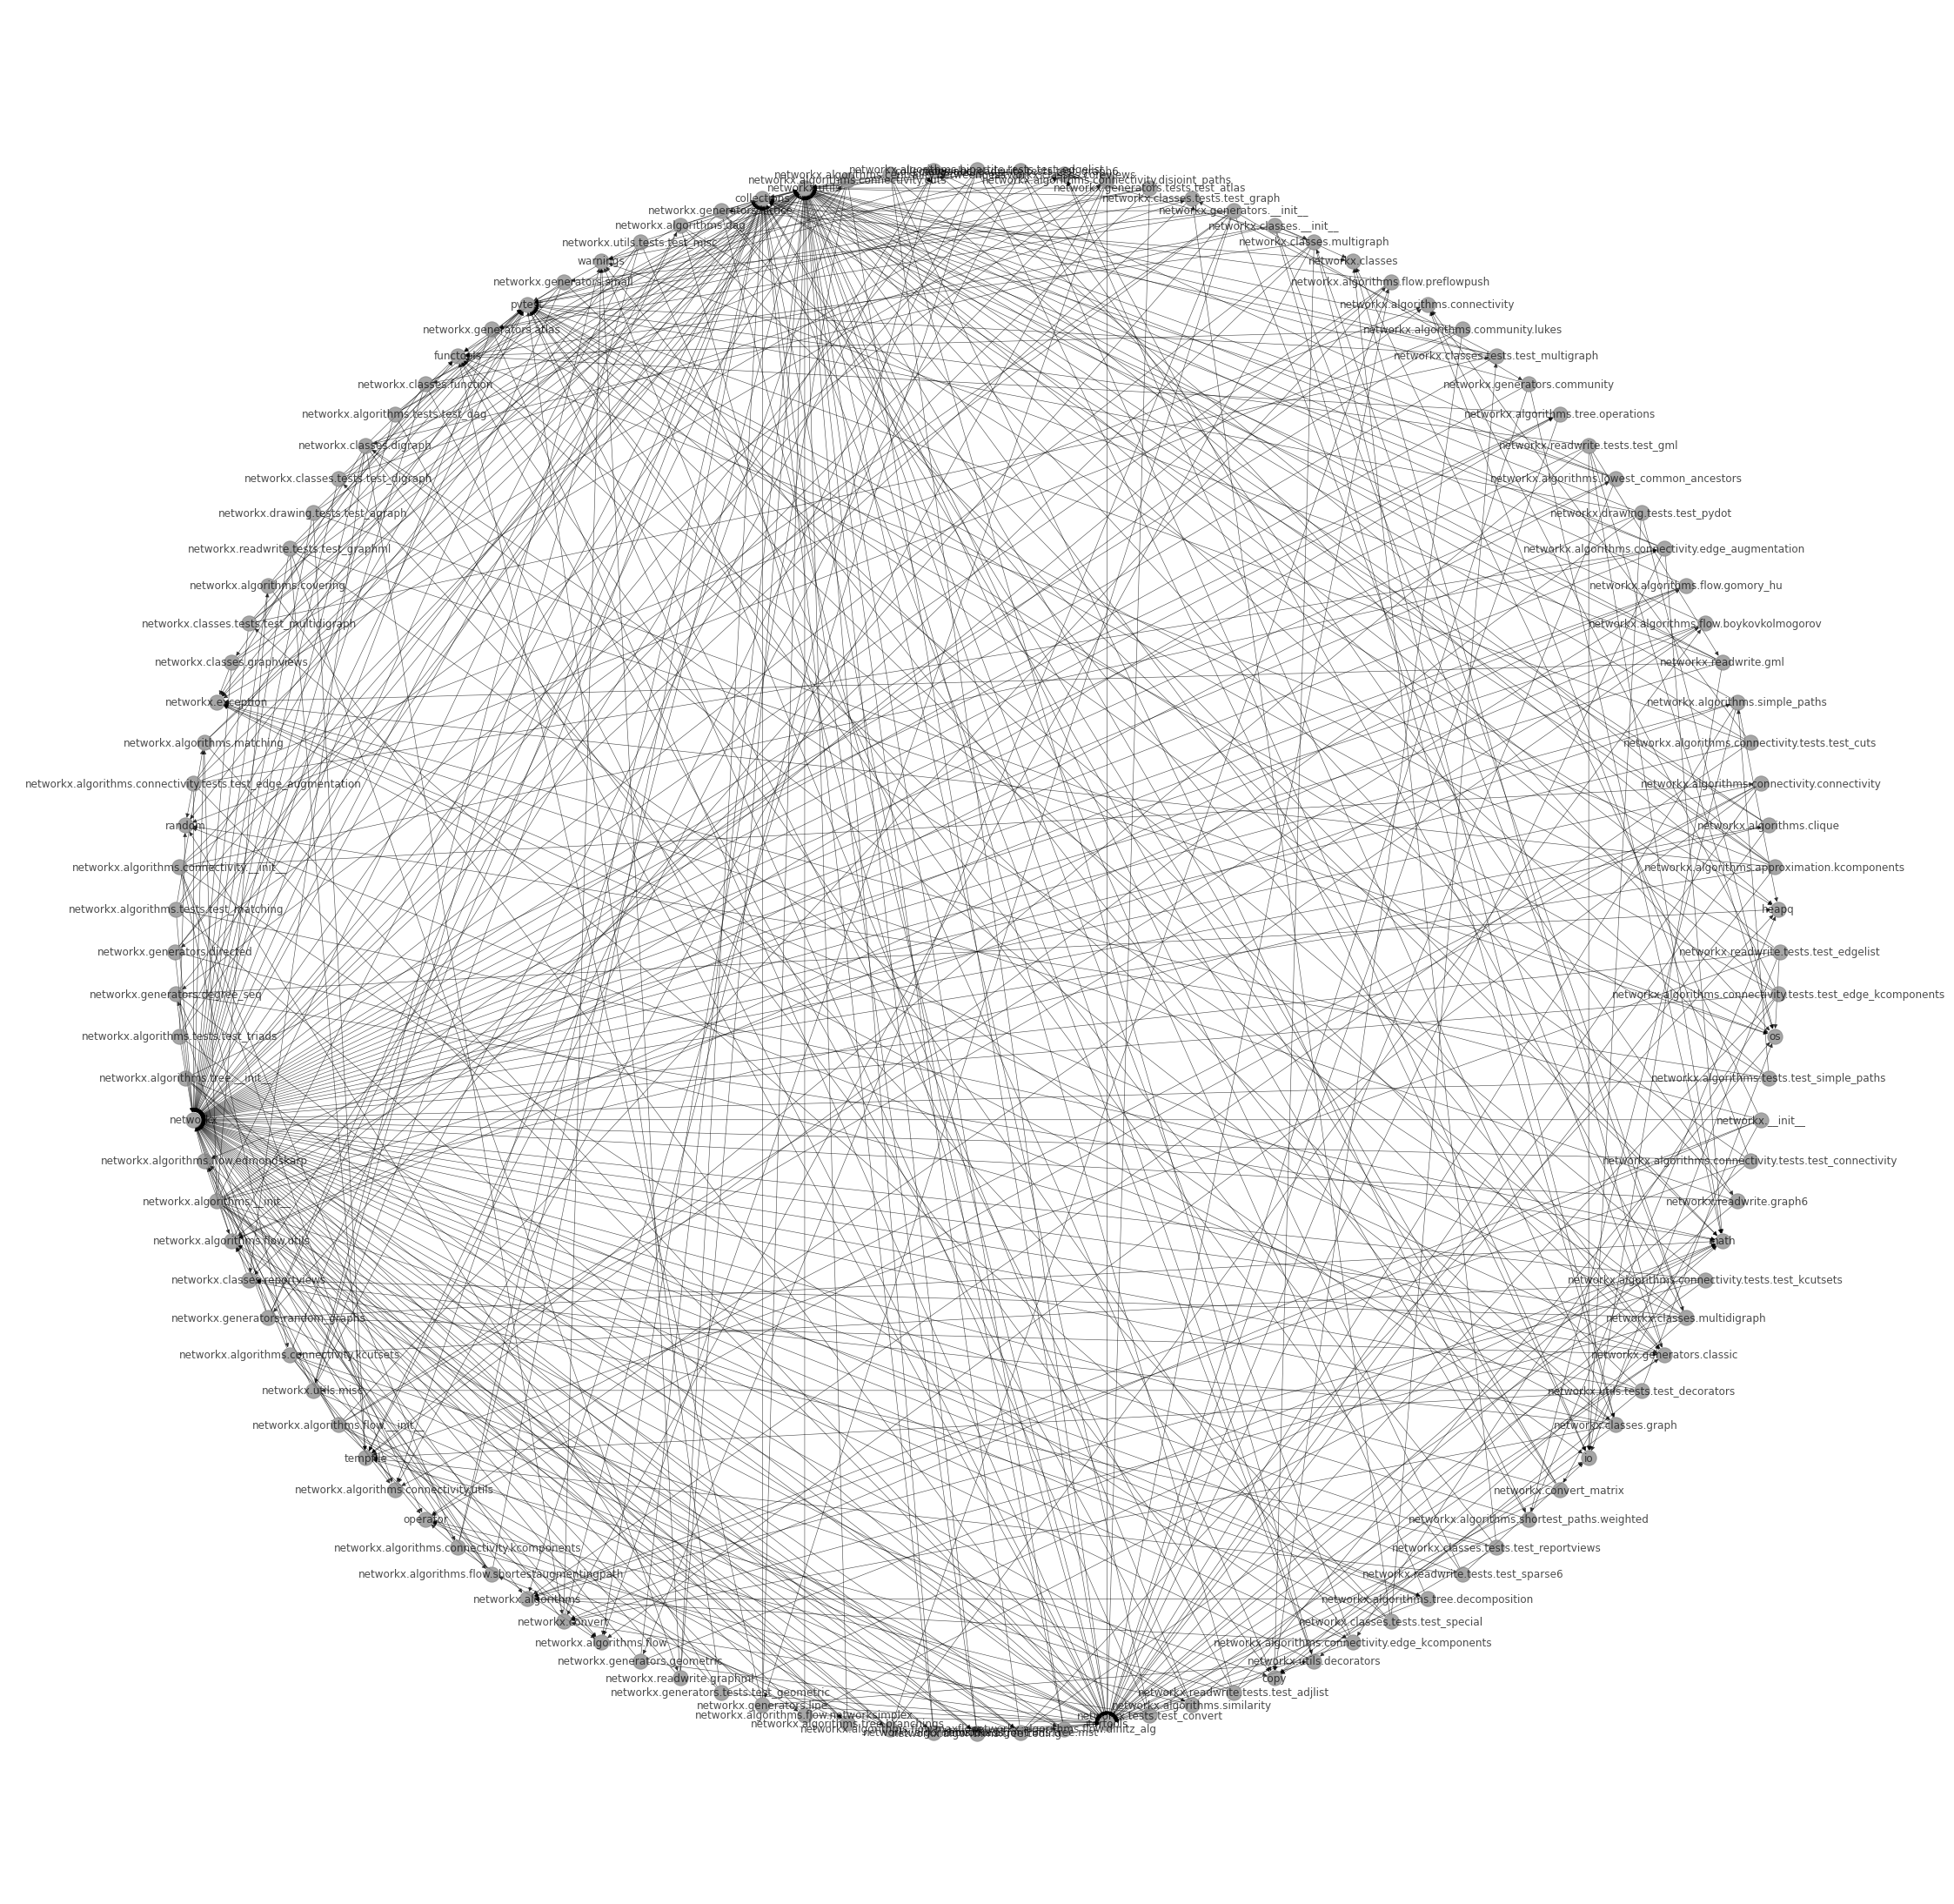

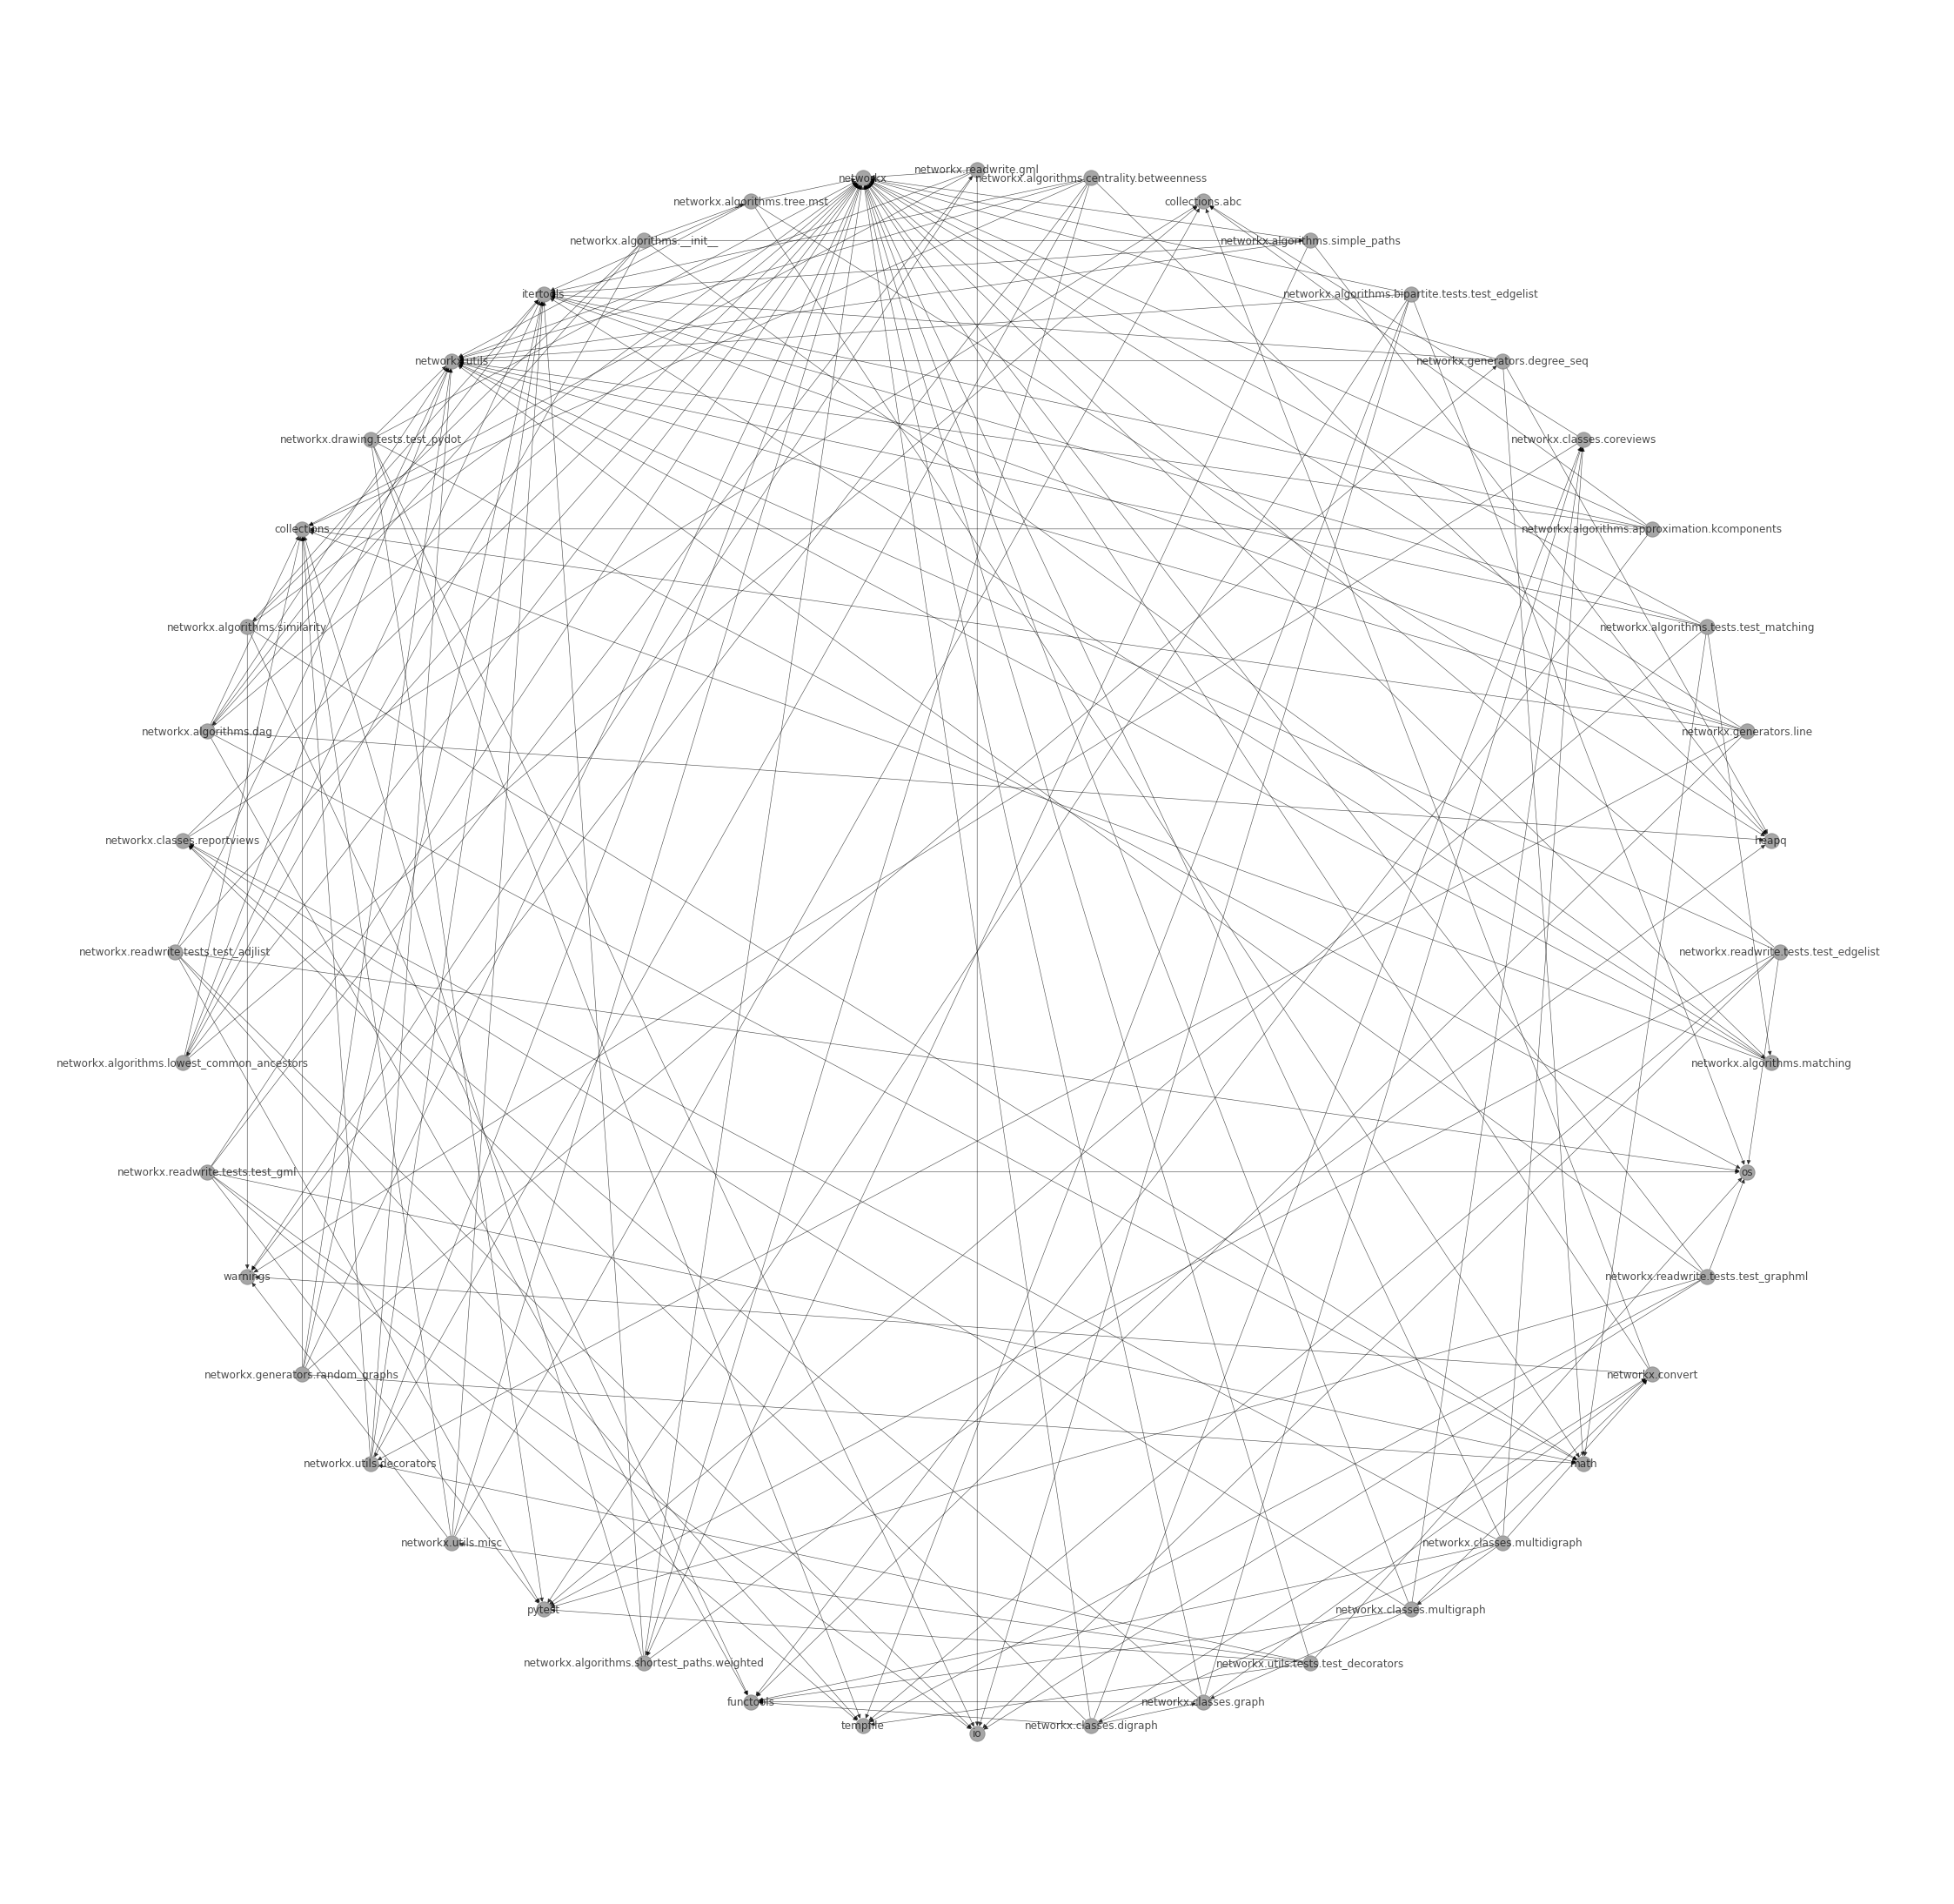

In [9]:
import matplotlib.pyplot as plt
ccs = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
Giant = nx.induced_subgraph(G, ccs[0])
G_ = nx.k_core(Giant,k=5)
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
nx.draw_circular(G_, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()

G_ = nx.k_core(Giant,k=6)
fig, ax = plt.subplots()
fig.set_size_inches(40,40)
nx.draw_circular(G_, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
plt.show()


In [55]:
print(Giant)

DiGraph with 710 nodes and 2018 edges


5.6845070422535215


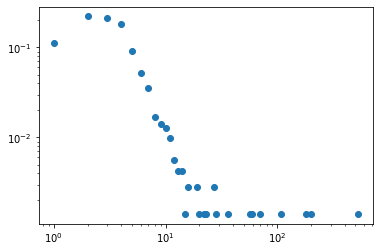

In [61]:
import collections
import matplotlib.pyplot as plt
import numpy as np
degrees = [degree for (id_node, degree) in G.degree()]
print(np.mean(degrees))
xs = collections.Counter(degrees).keys()
ys = list(collections.Counter(degrees).values())
ys = [ y / np.sum(ys) for y in ys]

fig,ax = plt.subplots()
ax.set_yscale('log')
ax.set_xscale('log')
plt.scatter(xs,ys)

In [69]:
degrees = sorted([(degree, id_node) for (id_node, degree) in G.degree()], reverse=True)
degrees[:50]

[(530, 'networkx'),
 (199, 'pytest'),
 (180, 'networkx.utils'),
 (108, 'itertools'),
 (70, 'networkx.algorithms.__init__'),
 (59, 'matplotlib.pyplot'),
 (57, 'collections'),
 (36, 'math'),
 (28, 'networkx.exception'),
 (27, 'networkx.utils.decorators'),
 (27, 'networkx.generators.__init__'),
 (23, 'networkx.algorithms'),
 (22, 'functools'),
 (20, 'os'),
 (19, 'random'),
 (19, 'networkx.algorithms.centrality.__init__'),
 (16, 'warnings'),
 (16, 'networkx.generators.classic'),
 (15, 'operator'),
 (14, 'networkx.algorithms.isomorphism.vf2pp'),
 (14, 'networkx.algorithms.approximation'),
 (14, 'io'),
 (13, 'networkx.readwrite.gml'),
 (13, 'networkx.generators.degree_seq'),
 (13, 'networkx.algorithms.approximation.__init__'),
 (12, 'tempfile'),
 (12, 'networkx.readwrite.__init__'),
 (12, 'networkx.algorithms.tree.mst'),
 (12, 'networkx.__init__'),
 (11, 'sys'),
 (11, 'networkx.readwrite.tests.test_gml'),
 (11, 'networkx.algorithms.flow.__init__'),
 (11, 'networkx.algorithms.centrality.betwe

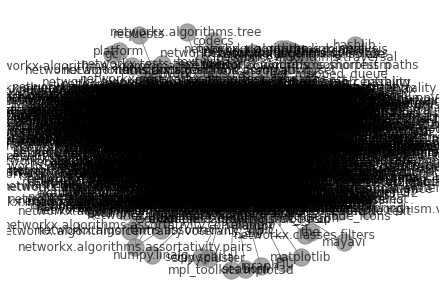

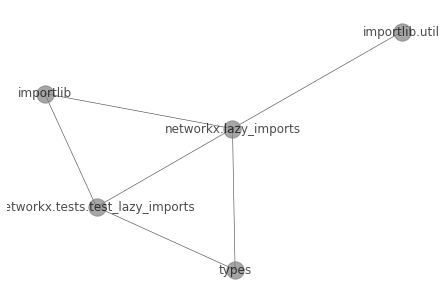

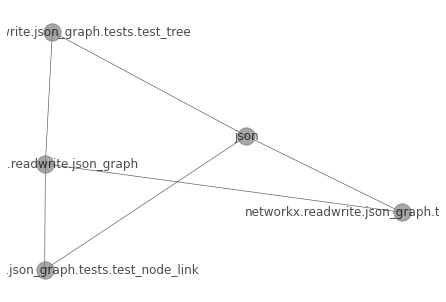

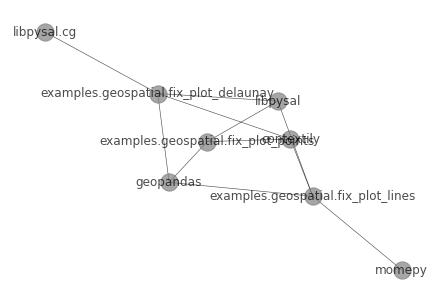

In [84]:
Giant = Giant.to_undirected()
coms = nx.algorithms.community.label_propagation.label_propagation_communities(Giant)
for com in coms:
    G_com = nx.induced_subgraph(Giant, com)
    if G_com.number_of_nodes() > 3:
        plt.figure()
        nx.draw_spring(G_com, with_labels=True, alpha=0.7, width=0.6, node_color='gray')
        plt.show()